# Zadanie 3

## Część 1:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
FOLDER_PREFIX = "../zad2/"
pd.set_option('display.max_columns', None)
helper = pd.read_csv(f"{FOLDER_PREFIX}gdp.csv")
df = pd.read_csv(f"{FOLDER_PREFIX}zad2.3.csv")
df

,location_key,country_name,iso_3166_1_alpha_3,population,population_male,population_female,population_density,gdp_usd,area_sq_km,date,search_trends_cough,search_trends_fever,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential,hdi,new_persons_vaccinated,new_persons_fully_vaccinated,new_persons_fully_vaccinated_pfizer,new_vaccine_doses_administered_pfizer,new_persons_fully_vaccinated_moderna,new_vaccine_doses_administered_moderna,new_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,new_deceased,new_deceased_age_0,new_deceased_age_1,new_deceased_age_2,new_deceased_age_3,new_deceased_age_4,new_deceased_age_5,new_deceased_age_6,new_deceased_age_7,new_deceased_age_8,new_deceased_age_9,new_confirmed,new_confirmed_age_0,new_confirmed_age_1,new_confirmed_age_2,new_confirmed_age_3,new_confirmed_age_4,new_confirmed_age_5,new_confirmed_age_6,new_confirmed_age_7,new_confirmed_age_8,new_confirmed_age_9,Year,Value,Rank,Capital,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Population,Country Code,Inflation,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita,ReporterISO3,ReporterName,TradeValue in 1000 USD
0,AD,Andorra,AND,77265.0,58625.0,55581.0,164.394,3.154058e+09,470.0,2022-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,203.0,Andorra la Vella,Europe,468.0,170.5641,1.01,0.0,79824.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,Andorra,AND,77265.0,58625.0,55581.0,164.394,3.154058e+09,470.0,2020-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,203.0,Andorra la Vella,Europe,468.0,170.5641,1.01,0.0,77700.0,AND,NaN,0.448884,0.000000,0.448884,0.000000,0.000000,0.000000,5.777148,NaN,NaN,NaN
2,AD,Andorra,AND,77265.0,58625.0,55581.0,164.394,3.154058e+09,470.0,2020-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,203.0,Andorra la Vella,Europe,468.0,170.5641,1.01,0.0,77700.0,AND,NaN,0.448884,0.000000,0.448884,0.000000,0.000000,0.000000,5.777148,NaN,NaN,NaN
3,AD,Andorra,AND,77265.0,58625.0,55581.0,164.394,3.154058e+09,470.0,2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,203.0,Andorra la Vella,Europe,468.0,170.5641,1.01,0.0,77700.0,AND,NaN,0.448884,0.000000,0.448884,0.000000,0.000000,0.000000,5.777148,NaN,NaN,NaN
4,AD,Andorra,AND,77265.0,58625.0,55581.0,164.394,3.154058e+09,470.0,2021-07-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AND,NaN,0.452888,0.000000,0.452888,0.000000,0.000000,0.000000,5.730292,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320338,US,United States of America,USA,331002647.0,163786016.0,167216631.0,36.185,2.137442e+13,9831510.0,2022-02-16,4.67,3.32,-11.0,-4.0,0.0,-25.0,-20.0,6.0,0.920,102700,0,0,0,0,0,0,0,2649,0,0,0,0,0,0,0,0,0,0,105547.0,12218.0,16703.0,18614.0,19844.0,16582.0,15100.0,11718.0,7112.0,NaN,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320339,US,United States of America,USA,331002647.0,163786016.0,167216631.0,36.185,2.137442e+13,9831510.0,2022-01-06,9.95,6.57,-19.0,-2.0,-19.0,-33.0,-30.0,11.0,0.920,370116,0,0,0,0,0,0,0,1998,0,0,0,0,0,0,0,0,0,0,764809.0,47650.0,71765.0,109307.0,95494.0,77879.0,65867.0,40364.0,18814.0,NaN,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<Axes: title={'center': 'new_confirmed filtered'}>

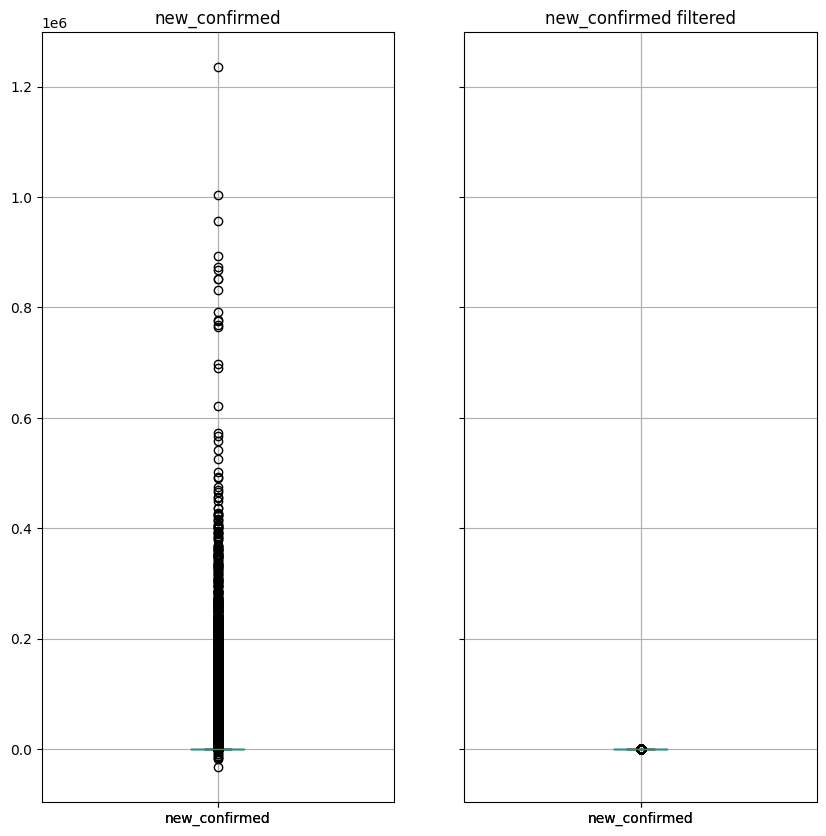

In [2]:
# filtrowanie IQR
column_name = "new_confirmed"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filtered")
df.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
filtered = df.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
#filtered = zscore(df[column_name], nan_policy='omit').to_frame()

filtered.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'new_deceased filter'}>

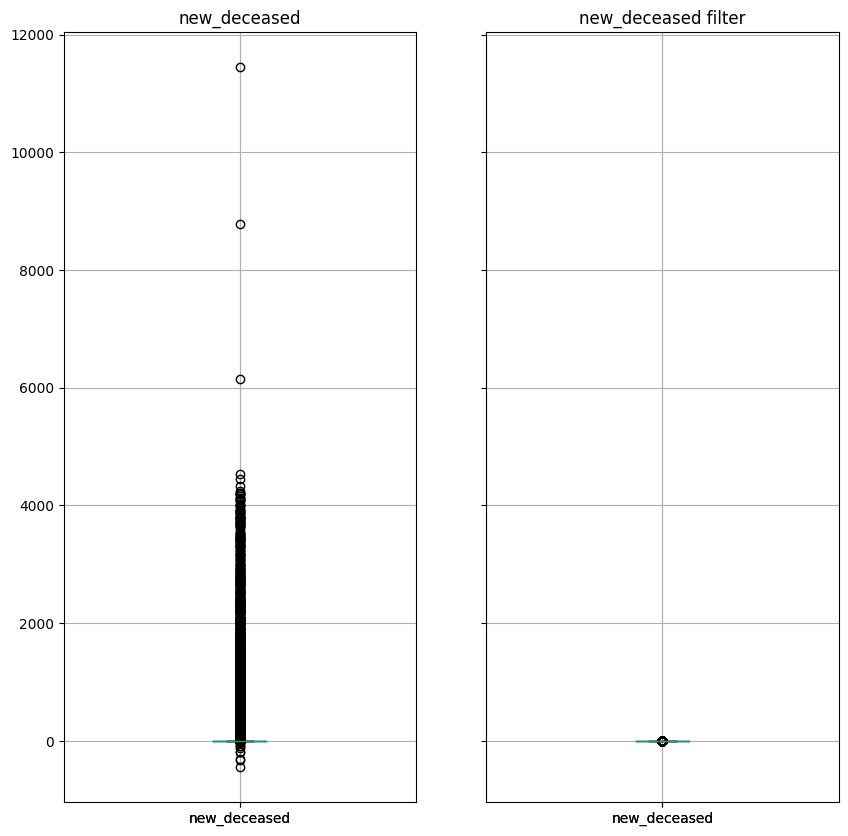

In [3]:
# filtrowanie zscore
column_name = "new_deceased"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filter")
df.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
filtered = df.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
# filtered = zscore(df[column_name], nan_policy='omit').to_frame()

filtered.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'new_persons_vaccinated filter'}>

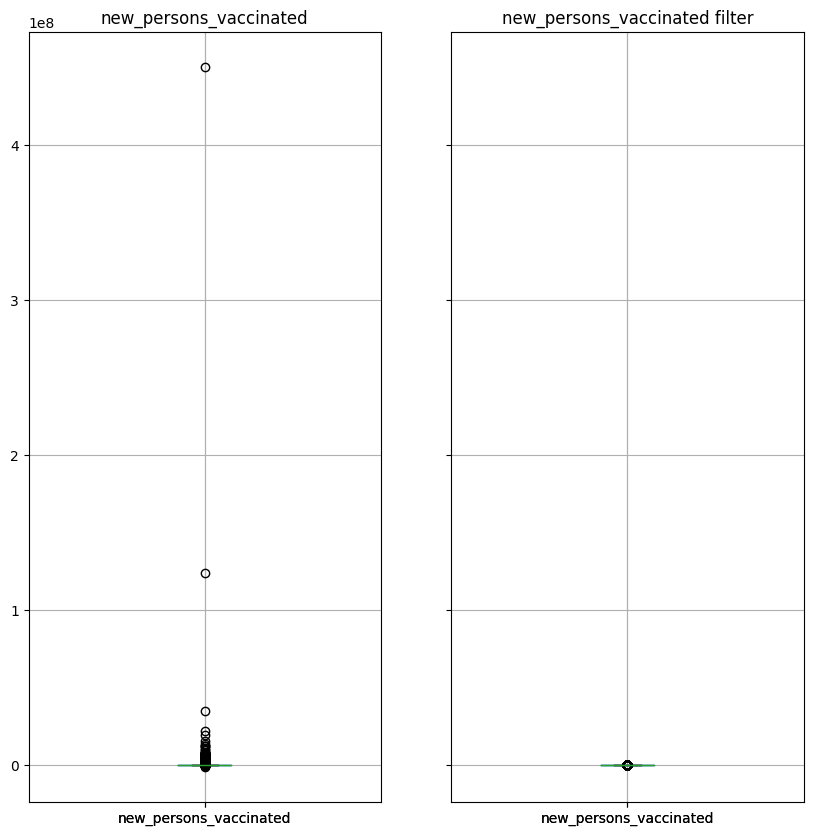

In [4]:
# filtrowanie zscore
column_name = "new_persons_vaccinated"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filter")
df.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
# Q1 = df[column_name].quantile(0.25)
# Q3 = df[column_name].quantile(0.75)
# IQR = Q3 - Q1
# filtered = df.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
filtered = zscore(df[column_name], nan_policy='omit').to_frame()

filtered.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'Population filter'}>

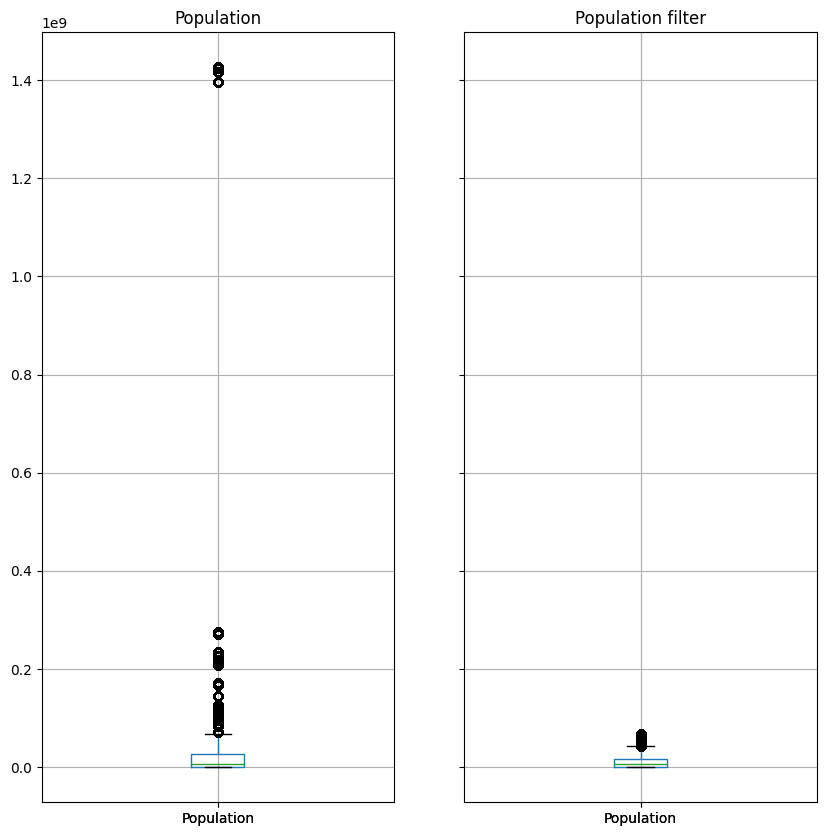

In [5]:
# filtrowanie population
column_name = "Population"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filter")
df.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
filtered = df.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
#filtered = zscore(df[column_name], nan_policy='omit').to_frame()

filtered.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'Value filter'}>

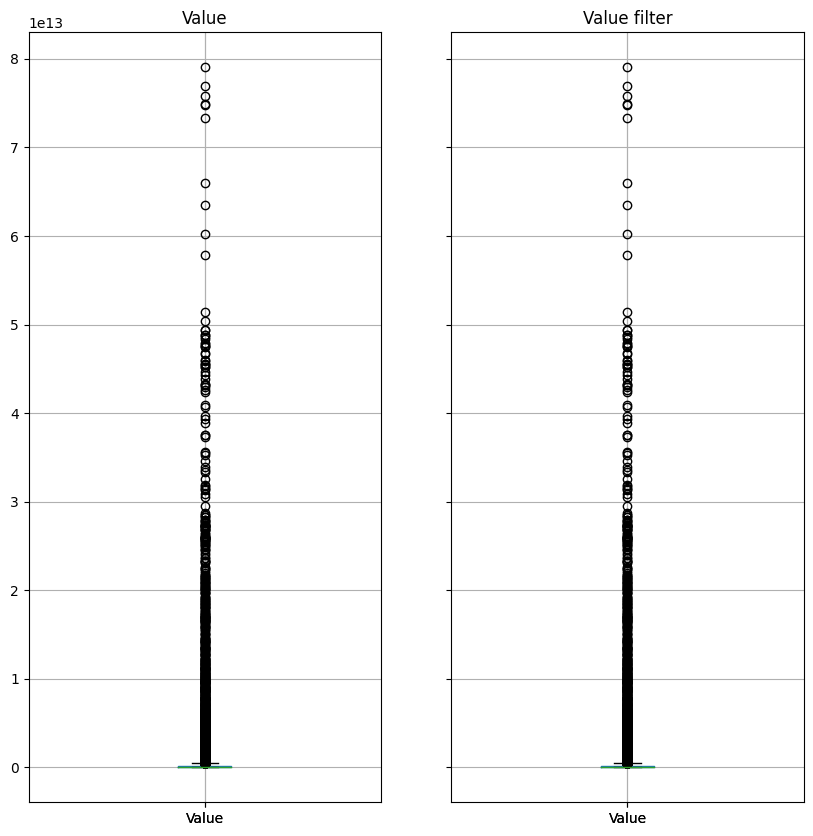

In [6]:
# filtrowanie population
column_name = "Value"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filter")
helper.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = helper[column_name].quantile(0.25)
Q3 = helper[column_name].quantile(0.75)
IQR = Q3 - Q1
filtered = helper.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
#filtered = zscore(helper[column_name], nan_policy='omit').to_frame()

helper.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'Inflation filter'}>

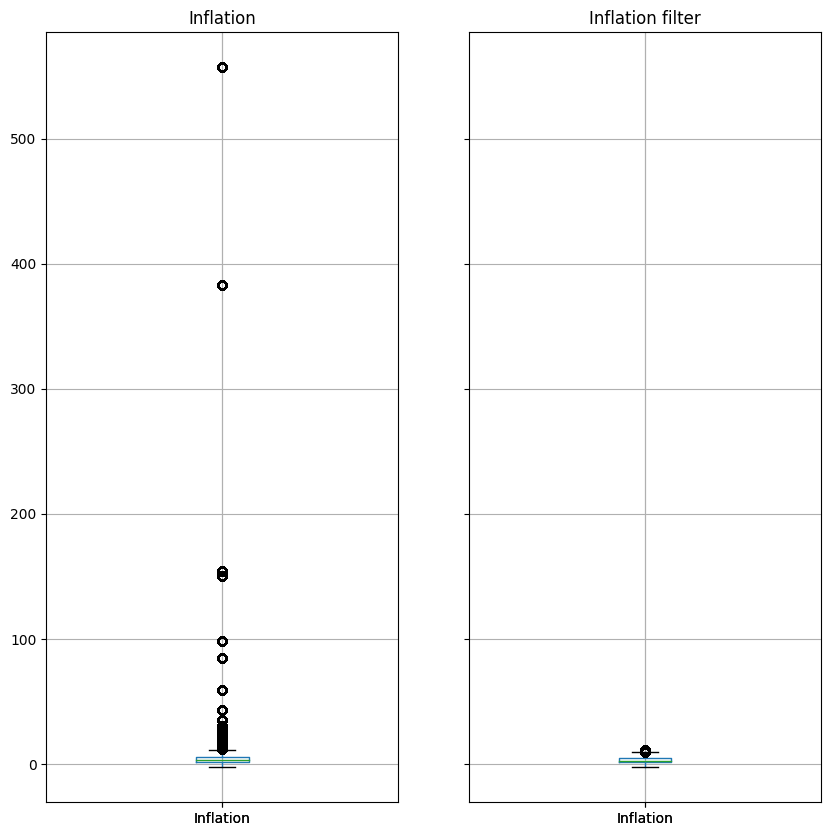

In [7]:
# filtrowanie population
column_name = "Inflation"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filter")
df.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
filtered = df.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
#filtered = zscore(df[column_name], nan_policy='omit').to_frame()

filtered.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'search_trends_cough filter'}>

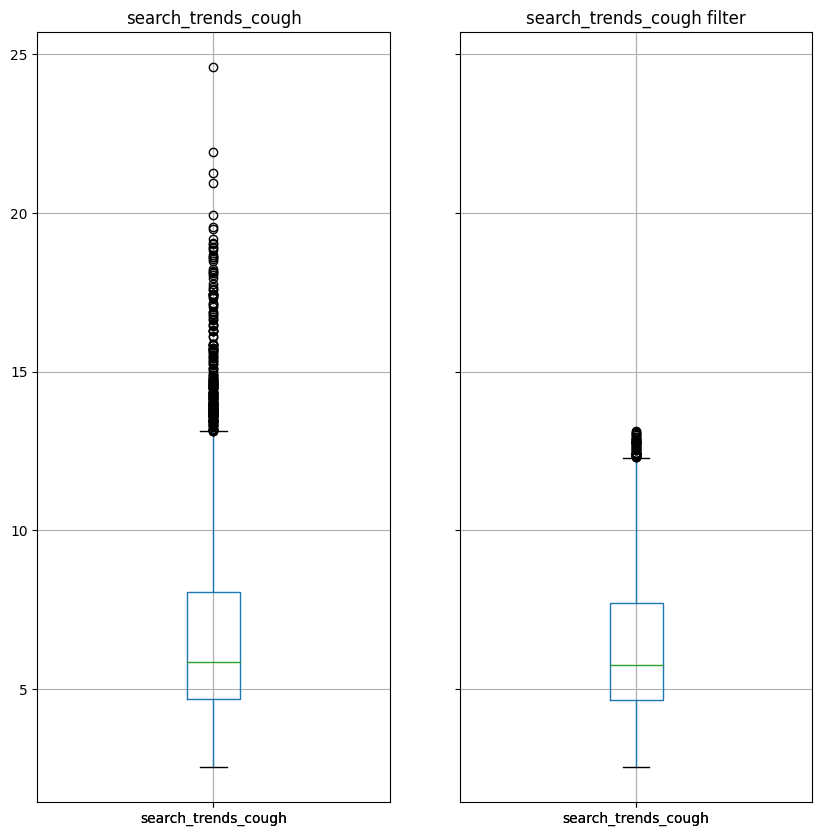

In [8]:
# filtrowanie 
column_name = "search_trends_cough"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filter")
df.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
filtered = df.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
#filtered = zscore(df[column_name], nan_policy='omit').to_frame()

filtered.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'mobility_parks filter'}>

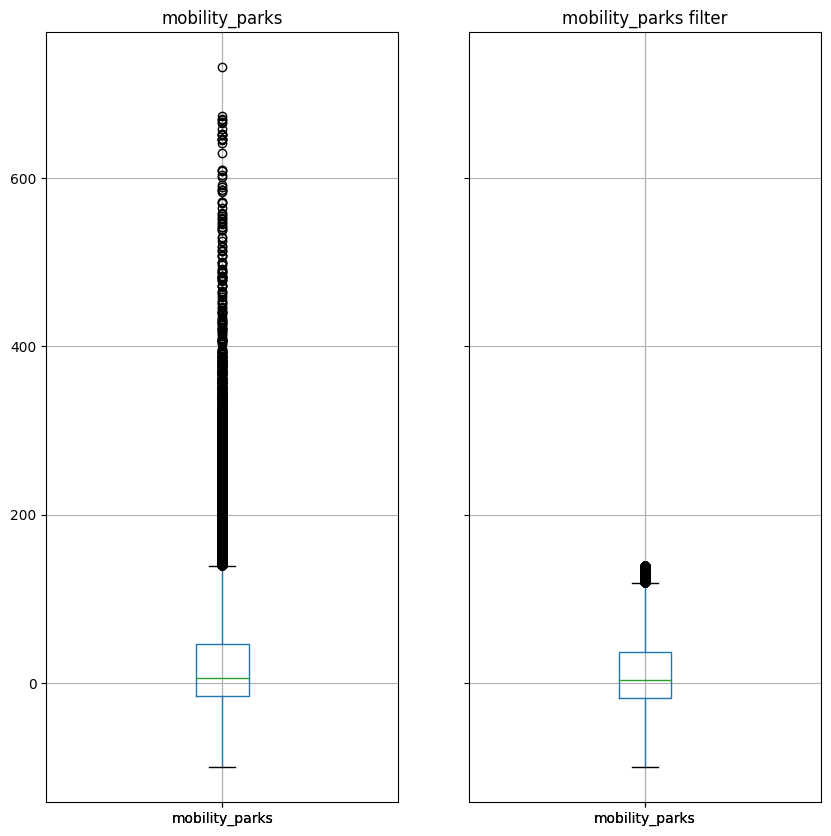

In [9]:
# filtrowanie population
column_name = "mobility_parks"
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filter")
df.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
filtered = df.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
#filtered = zscore(df[column_name], nan_policy='omit').to_frame()

filtered.boxplot(ax = ax[1], column=column_name)

<Axes: title={'center': 'export filter'}>

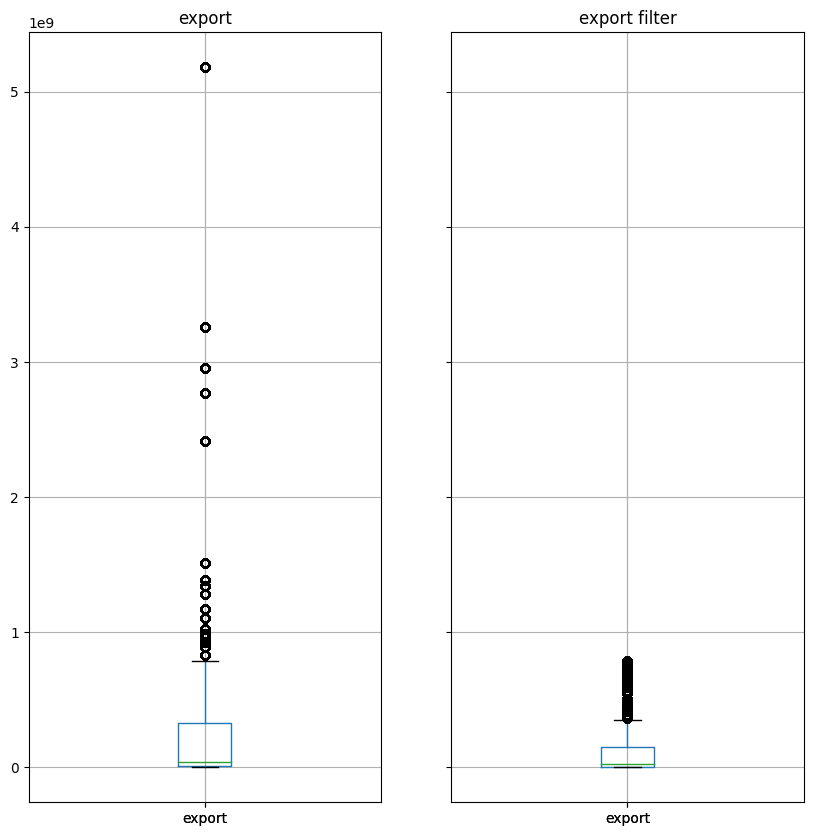

In [10]:
# filtrowanie eksportu
column_name = 'export'
df = df.rename(columns={"TradeValue in 1000 USD": "export"})
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 10), sharex = True, sharey = True)
ax[0].set_title(f"{column_name}")
ax[1].set_title(f"{column_name} filter")
df.boxplot(ax = ax[0], column=column_name)


# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
filtered = df.query(f'(@Q1 - 1.5 * @IQR) <= {column_name} <= (@Q3 + 1.5 * @IQR)')

#zscore
#filtered = zscore(df[column_name]).to_frame()

filtered.boxplot(ax = ax[1], column=column_name)

## Część 2:

In [14]:
# średni wzrost liczby nowych zachorowań na przestrzeni tygodnia / miesiąca / kwartału

df['date'] = pd.to_datetime(df['date'])
df.groupby([df.date.dt.year, df.date.dt.month])['new_confirmed'].mean().to_frame()

new_confirmed
date date               
2020 7        630.625393
     8        708.358487
     9        786.585739
     10      1068.343758
     11      1507.971291
     12      1638.624451
2021 1       1608.550612
     2       1023.226565
     3       1277.429127
     4       1988.816088
     5       1650.337978
     6       1025.423661
     7       1363.674154
     8       1729.564362
     9       1403.246838
     10      1113.276695
     11      1402.960304
     12      2227.433674
2022 1      12603.666294
     2       8687.846309
     3       6974.530352
     4       3435.878858
     5       2649.611275
     6       2819.233652
     7       4318.730372
     8       3490.152844
     9       2447.517616

In [15]:
# zachorowania / szczepienia / śmiertelność, a PKB / populacja krajów TODO:
df.groupby([df.date.dt.year, df.date.dt.month]).mean(numeric_only=True)

population  population_male  population_female  \
date date                                                     
2020 7     3.763696e+07     1.897841e+07       1.864167e+07   
     8     3.763696e+07     1.897841e+07       1.864167e+07   
     9     3.763696e+07     1.897841e+07       1.864167e+07   
     10    3.763696e+07     1.897841e+07       1.864167e+07   
     11    3.763696e+07     1.897841e+07       1.864167e+07   
     12    3.763696e+07     1.897841e+07       1.864167e+07   
2021 1     3.763696e+07     1.897841e+07       1.864167e+07   
     2     3.763696e+07     1.897841e+07       1.864167e+07   
     3     3.763696e+07     1.897841e+07       1.864167e+07   
     4     3.763696e+07     1.897841e+07       1.864167e+07   
     5     3.763696e+07     1.897841e+07       1.864167e+07   
     6     3.763696e+07     1.897841e+07       1.864167e+07   
     7     3.763696e+07     1.897841e+07       1.864167e+07   
     8     3.763696e+07     1.897841e+07       1.864167e+07   
     9     3.763696e+07     1.897841e+07       1.864167e+07   
     10    3.763696e+07     1.897841e+07       1.864167e+07   
     11    3.763696e+07     1.897841e+07       1.864167e+07   
     12    3.763696e+07     1.897841e+07       1.864167e+07   
2022 1     3.782302e+07     1.907221e+07       1.873380e+07   
     2     3.782302e+07     1.907221e+07       1.873380e+07   
     3     3.782302e+07     1.907221e+07       1.873380e+07   
     4     3.782302e+07     1.907221e+07       1.873380e+07   
     5     3.782302e+07     1.907221e+07       1.873380e+07   
     6     3.782302e+07     1.907221e+07       1.873380e+07   
     7     3.782302e+07     1.907221e+07       1.873380e+07   
     8     3.782302e+07     1.907221e+07       1.873380e+07   
     9     3.782302e+07     1.907221e+07       1.873380e+07   

           population_density       gdp_usd     area_sq_km  \
date date                                                    
2020 7             483.701369  4.271428e+11  652686.172414   
     8             483.701369  4.271428e+11  652686.172414   
     9             483.701369  4.271428e+11  652686.172414   
     10            483.701369  4.271428e+11  652686.172414   
     11            483.701369  4.271428e+11  652686.172414   
     12            483.701369  4.271428e+11  652686.172414   
2021 1             483.701369  4.271428e+11  652686.172414   
     2             483.701369  4.271428e+11  652686.172414   
     3             483.701369  4.271428e+11  652686.172414   
     4             483.701369  4.271428e+11  652686.172414   
     5             483.701369  4.271428e+11  652686.172414   
     6             483.701369  4.271428e+11  652686.172414   
     7             483.701369  4.271428e+11  652686.172414   
     8             483.701369  4.271428e+11  652686.172414   
     9             483.701369  4.271428e+11  652686.172414   
     10            483.701369  4.271428e+11  652686.172414   
     11            483.701369  4.271428e+11  652686.172414   
     12            483.701369  4.271428e+11  652686.172414   
2022 1             485.083134  4.292522e+11  655916.004950   
     2             485.083134  4.292522e+11  655916.004950   
     3             485.083134  4.292522e+11  655916.004950   
     4             485.083134  4.292522e+11  655916.004950   
     5             485.083134  4.292522e+11  655916.004950   
     6             485.083134  4.292522e+11  655916.004950   
     7             485.083134  4.292522e+11  655916.004950   
     8             485.083134  4.292522e+11  655916.004950   
     9             485.083134  4.292522e+11  655916.004950   

           search_trends_cough  search_trends_fever  \
date date                                             
2020 7                4.576774             5.170054   
     8                4.607796             4.982151   
     9                5.506889             5.326944   
     10               5.165699             4.794462   
     11               5.114778             4.456667   
 

In [120]:
# zachorowania / szczepienia / śmiertelność, a PKB / populacja krajów TODO:
tet = df.groupby([df.date.dt.year, df.date.dt.month])['new_persons_vaccinated'].agg(['mean', 'std'])
tet

mean           std
date date                            
2020 7         0.000000  0.000000e+00
     8         0.000000  0.000000e+00
     9         0.000000  0.000000e+00
     10        0.000000  0.000000e+00
     11        0.000000  0.000000e+00
     12      491.665953  1.400212e+04
2021 1      3789.623057  4.534883e+04
     2      6503.032961  6.048816e+04
     3     14090.318298  1.215871e+05
     4     18598.562455  1.515745e+05
     5     17384.160461  1.056425e+05
     6     26791.301071  1.996743e+05
     7     28379.218415  1.862638e+05
     8     63464.775920  3.753739e+06
     9     34884.842684  3.623047e+05
     10    23586.051530  1.895734e+05
     11    29754.782298  1.063450e+06
     12    20260.412309  3.514115e+05
2022 1     33324.011408  3.072426e+05
     2     25321.187718  3.176696e+05
     3     13245.355232  1.198599e+05
     4      8461.043631  8.185913e+04
     5      5867.262261  6.063142e+04
     6      6738.135230  9.389822e+04
     7      9110.593365  1.979995e+05
     8      6617.956334  9.605326e+04
     9      4542.846246  7.221659e+04

In [16]:
# efektywność szczepień (np. poprzez porównanie liczby zaszczepionych osób z liczbą nowych zachorowań i zgonów)
tet = df.groupby([df.date.dt.year, df.date.dt.month])[['new_persons_vaccinated','new_deceased', 'new_confirmed']].agg(['mean', 'std'])
tet

new_persons_vaccinated               new_deceased              \
                            mean           std         mean         std   
date date                                                                 
2020 7                  0.000000  0.000000e+00    13.193272   89.860521   
     8                  0.000000  0.000000e+00    13.306348   89.539697   
     9                  0.000000  0.000000e+00    12.293005   86.350375   
     10                 0.000000  0.000000e+00    12.844374   67.966920   
     11                 0.000000  0.000000e+00    20.673519   99.271796   
     12               491.665953  1.400212e+04    25.640119  152.222714   
2021 1               3789.623057  4.534883e+04    29.553291  184.254224   
     2               6503.032961  6.048816e+04    22.265525  135.740805   
     3              14090.318298  1.215871e+05    20.310631  130.907564   
     4              18598.562455  1.515745e+05    27.271378  179.433098   
     5              17384.160461  1.056425e+05    26.193756  210.353893   
     6              26791.301071  1.996743e+05    19.946324  155.121768   
     7              28379.218415  1.862638e+05    18.912344  132.336348   
     8              63464.775920  3.753739e+06    22.078746  114.276016   
     9              34884.842684  3.623047e+05    18.858387  109.228342   
     10             23586.051530  1.895734e+05    14.928576   93.859458   
     11             29754.782298  1.063450e+06    15.759315   91.497891   
     12             20260.412309  3.514115e+05    14.618913   92.512451   
2022 1              33324.011408  3.072426e+05    32.397718  163.046798   
     2              25321.187718  3.176696e+05    39.823171  184.085907   
     3              13245.355232  1.198599e+05    24.193680  167.875205   
     4               8461.043631  8.185913e+04    11.420867   48.851150   
     5               5867.262261  6.063142e+04     6.666404   32.284683   
     6               6738.135230  9.389822e+04     6.386314   33.038023   
     7               9110.593365  1.979995e+05     8.894833   41.212733   
     8               6617.956334  9.605326e+04     9.650538   44.737306   
     9               4542.846246  7.221659e+04     5.428503   31.514669   

          new_confirmed                
                   mean           std  
date date                              
2020 7       630.625393   4453.712496  
     8       708.358487   4788.563904  
     9       786.585739   5353.435503  
     10     1068.343758   5363.825148  
     11     1507.971291   8774.776977  
     12     1638.624451  11240.721959  
2021 1      1608.550612  10966.924327  
     2      1023.226565   5405.851255  
     3      1277.429127   5922.721828  
     4      1988.816088  14734.209399  
     5      1650.337978  15669.837010  
     6      1025.423661   5911.825972  
     7      1363.674154   5755.580670  
     8      1729.564362   8502.181968  
     9      1403.246838   8102.128517  
     10     1113.276695   5538.960134  
     11     1402.960304   6611.759813  
     12     2227.433674  15263.664373  
2022 1     12603.666294  56008.236698  
     2      8687.846309  27944.888756  
     3      6974.530352  32308.193627  
     4      3435.878858  16306.997172  
     5      2649.611275  13301.485330  
     6      2819.233652  12505.744651  
     7      4318.730372  19190.649735  
     8      3490.152844  18517.639950  
     9      2447.517616  11350.521404

In [17]:
# mediana nowych zachorowań / szczepień / zgonów na milion mieszkańców
tet = df.groupby([df.date.dt.year, df.date.dt.month])[['new_persons_vaccinated','new_deceased', 'new_confirmed']].agg(lambda x: np.median(x/1000000))
tet

new_persons_vaccinated  new_deceased  new_confirmed
date date                                                     
2020 7                        0.0      0.000000            NaN
     8                        0.0      0.000000            NaN
     9                        0.0      0.000000            NaN
     10                       0.0      0.000000            NaN
     11                       0.0      0.000000            NaN
     12                       0.0      0.000000            NaN
2021 1                        0.0      0.000000            NaN
     2                        0.0      0.000000            NaN
     3                        0.0      0.000000            NaN
     4                        0.0      0.000000            NaN
     5                        0.0      0.000000            NaN
     6                        0.0      0.000000            NaN
     7                        0.0      0.000000            NaN
     8                        0.0      0.000000            NaN
     9                        0.0      0.000000            NaN
     10                       0.0      0.000000            NaN
     11                       0.0      0.000000            NaN
     12                       0.0      0.000000            NaN
2022 1                        0.0      0.000001            NaN
     2                        0.0      0.000001            NaN
     3                        0.0      0.000000            NaN
     4                        0.0      0.000000            NaN
     5                        0.0      0.000000            NaN
     6                        0.0      0.000000            NaN
     7                        0.0      0.000000            NaN
     8                        0.0      0.000000            NaN
     9                        0.0      0.000000            NaN

In [28]:
# odchylenie standardowe wzrostu lub spadku liczby nowych zachorowań / szczepień / zgonów.
tet = df.groupby([df.date.dt.year, df.date.dt.month])[['new_persons_vaccinated','new_deceased', 'new_confirmed']].agg(['std'])
tet

new_persons_vaccinated new_deceased new_confirmed
                             std          std           std
date date                                                  
2020 7              0.000000e+00    89.860521   4453.712496
     8              0.000000e+00    89.539697   4788.563904
     9              0.000000e+00    86.350375   5353.435503
     10             0.000000e+00    67.966920   5363.825148
     11             0.000000e+00    99.271796   8774.776977
     12             1.400212e+04   152.222714  11240.721959
2021 1              4.534883e+04   184.254224  10966.924327
     2              6.048816e+04   135.740805   5405.851255
     3              1.215871e+05   130.907564   5922.721828
     4              1.515745e+05   179.433098  14734.209399
     5              1.056425e+05   210.353893  15669.837010
     6              1.996743e+05   155.121768   5911.825972
     7              1.862638e+05   132.336348   5755.580670
     8              3.753739e+06   114.276016   8502.181968
     9              3.623047e+05   109.228342   8102.128517
     10             1.895734e+05    93.859458   5538.960134
     11             1.063450e+06    91.497891   6611.759813
     12             3.514115e+05    92.512451  15263.664373
2022 1              3.072426e+05   163.046798  56008.236698
     2              3.176696e+05   184.085907  27944.888756
     3              1.198599e+05   167.875205  32308.193627
     4              8.185913e+04    48.851150  16306.997172
     5              6.063142e+04    32.284683  13301.485330
     6              9.389822e+04    33.038023  12505.744651
     7              1.979995e+05    41.212733  19190.649735
     8              9.605326e+04    44.737306  18517.639950
     9              7.221659e+04    31.514669  11350.521404

### Dodatkowe informacje

In [25]:
# średni export dla kontynentu 1
tet = df.groupby([df.date.dt.year, 'Continent'])
tet = tet[['export']].agg(['mean']).dropna()
tet

export
                            mean
date Continent                  
2020 Africa         1.658145e+07
     Asia           3.898431e+08
     Europe         3.501322e+08
     North America  1.362111e+08
     Oceania        1.414761e+08
     South America  8.266718e+07

In [27]:
# mediana inflacji dla kontynentu 2
tet = df.groupby([df.date.dt.year, 'Continent'])
tet = tet[['Inflation']].agg(['median', 'mean'])
tet

Inflation           
                      median       mean
date Continent                         
2020 Africa         3.301807  21.045108
     Asia           2.393162   5.385542
     Europe         0.740792   1.108841
     North America  0.598986   1.918301
     Oceania        0.698902   1.198123
     South America  2.264524   5.879838
2022 Africa              NaN        NaN
     Asia                NaN        NaN
     Europe              NaN        NaN
     North America       NaN        NaN
     Oceania             NaN        NaN
     South America       NaN        NaN

In [33]:
# zanieczyszcz dla kontynentu per capita 3
tet = df.groupby([df.date.dt.year, 'Continent'])
tet = tet[['Per Capita']].agg(['mean'])
tet

Per Capita
                         mean
date Continent               
2020 Africa          1.191911
     Asia            6.989081
     Europe          5.941449
     North America   3.959871
     Oceania         3.753547
     South America   2.577644
2022 Africa               NaN
     Asia                 NaN
     Europe               NaN
     North America        NaN
     Oceania              NaN
     South America        NaN

In [35]:
# przeszukiwanie kaszlu i gorączki w wyszukiwarce 4
tet = df.groupby([df.date.dt.year, df.date.dt.month])[['search_trends_cough', 'search_trends_fever']]
tet = tet.mean()
tet

search_trends_cough  search_trends_fever
date date                                          
2020 7                4.576774             5.170054
     8                4.607796             4.982151
     9                5.506889             5.326944
     10               5.165699             4.794462
     11               5.114778             4.456667
     12               5.283871             4.319301
2021 1                5.017688             4.323011
     2                4.917619             4.155595
     3                5.380968             4.287258
     4                5.735611             4.461333
     5                6.388817             4.657688
     6                6.681556             4.707611
     7                7.388280             5.271935
     8                6.638763             4.933280
     9                6.423444             4.588333
     10               7.038118             4.724570
     11               7.089056             4.648611
     12               7.247312             5.039785
2022 1                6.924301             5.680376
     2                6.720833             5.742083
     3                8.096613             6.120860
     4                7.786833             5.436222
     5                8.733763             6.238172
     6               10.233111             6.822556
     7                9.962849             6.914677
     8                8.560161             5.588011
     9                8.367639             5.217222

In [36]:
# gestosc zaludnienia w wyszukiwarce 5
tet = df.groupby([df.date.dt.year, df.date.dt.month])[['new_deceased', 'population_density']]
tet = tet.sem() # Stard Error of Mean
tet

new_deceased  population_density
date date                                  
2020 7         0.746844           31.402116
     8         0.744177           31.402116
     9         0.729533           31.921279
     10        0.564883           31.402116
     11        0.838700           31.921279
     12        1.265145           31.402116
2021 1         1.531363           31.402116
     2         1.187061           33.041857
     3         1.087991           31.402116
     4         1.515945           31.921279
     5         1.748281           31.402116
     6         1.310550           31.921279
     7         1.099866           31.402116
     8         0.949764           31.402116
     9         0.922818           31.921279
     10        0.780079           31.402116
     11        0.773022           31.921279
     12        0.768884           31.402116
2022 1         1.867084           31.556604
     2         2.218063           33.204413
     3         1.922375           31.556604
     4         0.568652           32.078321
     5         0.369699           31.556604
     6         0.384579           32.078321
     7         0.471936           31.556604
     8         0.512297           31.556604
     9         0.487327           42.616248

In [39]:
# ruch sklepach i aptekach 6
tet = df.groupby([df.date.dt.year, df.date.dt.month])[['new_deceased', 'mobility_grocery_and_pharmacy']]
tet = tet.mean() # Stard Error of Mean
tet

new_deceased  mobility_grocery_and_pharmacy
date date                                             
2020 7        13.193272                      -4.328013
     8        13.306348                      -4.771888
     9        12.293005                      -3.079800
     10       12.844374                       0.655835
     11       20.673519                      -0.785539
     12       25.640119                       6.407495
2021 1        29.553291                      -5.653536
     2        22.265525                       0.428834
     3        20.310631                       7.203985
     4        27.271378                       9.560539
     5        26.193756                      17.106262
     6        19.946324                      22.553922
     7        18.912344                      25.810484
     8        22.078746                      27.929300
     9        18.858387                      29.380917
     10       14.928576                      31.543546
     11       15.759315                      33.514761
     12       14.618913                      39.990650
2022 1        32.397718                      29.162581
     2        39.823171                      34.769385
     3        24.193680                      39.284852
     4        11.420867                      41.354454
     5         6.666404                      43.815243
     6         6.386314                      45.400381
     7         8.894833                      46.533158
     8         9.650538                      51.011085
     9         5.428503                      52.080357

In [42]:
#  mediana zachorowan grup wiekowych 7 
tet = df.groupby([df.date.dt.year, df.date.dt.month])[['new_confirmed_age_0', 'new_confirmed_age_1', 'new_confirmed_age_2', 'new_confirmed_age_3', 'new_confirmed_age_4', 'new_confirmed_age_5', 'new_confirmed_age_6']]
tet = tet.median()
tet

new_confirmed_age_0  new_confirmed_age_1  new_confirmed_age_2  \
date date                                                                  
2020 7                    23.5                 38.0                 78.5   
     8                    19.5                 44.0                100.0   
     9                    31.5                 73.5                146.5   
     10                   73.0                136.0                309.0   
     11                   63.0                 95.0                270.0   
     12                   48.0                 79.0                259.0   
2021 1                    41.0                 92.0                289.0   
     2                    68.0                141.5                377.0   
     3                   103.5                188.0                403.0   
     4                    92.0                141.0                313.0   
     5                    64.0                109.0                 95.0   
     6                    20.0                 29.0                 52.0   
     7                    17.0                 62.0                 96.0   
     8                    30.5                 70.0                 79.0   
     9                    39.0                 84.0                 72.0   
     10                   48.0                 93.0                 94.5   
     11                   64.5                129.0                136.0   
     12                   51.0                 91.0                144.0   
2022 1                   861.0               1752.0               3501.5   
     2                   720.5               1194.5               1791.0   
     3                   235.5                405.0                696.0   
     4                    51.0                 69.0                153.0   
     5                    51.5                 73.0                168.5   
     6                   133.0                314.5                678.0   
     7                   854.0               1423.0               3300.0   
     8                   165.0                254.0                892.0   
     9                    96.5                126.0                221.0   

           new_confirmed_age_3  new_confirmed_age_4  new_confirmed_age_5  \
date date                                                                  
2020 7                   109.5                 67.5                 54.0   
     8                   108.0                 55.5                 37.0   
     9                   188.0                133.5                 64.0   
     10                  351.0                248.0                150.0   
     11                  223.0                122.5                 74.0   
     12                  247.0                151.0                 97.0   
2021 1                   360.0                260.0                180.0   
     2                   444.0                319.0                222.0   
     3                   408.5                317.0                213.0   
     4                   348.0                234.0                180.0   
     5                   116.0                132.0                150.0   
     6                    78.0                 51.0                 45.0   
     7                    44.0                 31.0                 20.0   
     8                    86.0                 64.0                 38.0   
     9                    82.0                 69.5                 38.0   
     10                  118.0                102.0                 65.0   
     11                  194.5                166.0                108.0   
     12                  207.0                175.0                127.0   
2022 1                  4445.5               3500.0               1744.0   
     2                  2157.0               1879.0               1285.5   
     3                   800.5                694.0                496.5   
     4                   171.0                155.5       

In [51]:
#  max zanieczyszczeń gazów 8
tet = df.groupby([df.date.dt.year, 'Continent'])[['Gas']]
tet = tet.max().dropna()
tet

Gas
date Continent                
2020 Africa         119.028841
     Asia           687.880944
     Europe         780.781499
     North America  223.719402
     Oceania         84.471564
     South America   90.212510

In [52]:
#  std mobility workplaces 10
tet = df.groupby([df.date.dt.year, df.date.dt.quarter, 'Continent'])[['mobility_workplaces']]
tet = tet.std()
tet

mobility_workplaces
date date Continent                         
2020 3    Africa                   12.729243
          Asia                     14.209262
          Europe                   16.185145
          North America            12.491176
          Oceania                   8.830415
          South America            15.933367
     4    Africa                   13.807385
          Asia                     16.632891
          Europe                   15.698846
          North America            13.469871
          Oceania                  18.114231
          South America            15.108389
2022 1    Africa                   26.893773
          Asia                     32.006097
          Europe                   14.916192
          North America            16.918127
          Oceania                  20.122548
          South America            18.376288
     2    Africa                   30.100486
          Asia                     36.377752
          Europe                   18.441177
          North America            19.745950
          Oceania                  24.293239
          South America            22.563857
     3    Africa                   31.391693
          Asia                     33.879768
          Europe                   18.094940
          North America            19.446077
          Oceania                  19.835152
          South America            18.577580

In [54]:
# min mobility workplaces 10
tet = df.groupby([df.date.dt.year, 'Continent'])[['Growth Rate']]
tet = tet.mean()
tet

Growth Rate
date Continent                 
2020 Africa            1.021306
     Asia              1.008935
     Europe            1.002349
     North America     1.005297
     Oceania           1.010350
     South America     1.007236
2022 Africa            1.021306
     Asia              1.008935
     Europe            1.002349
     North America     1.005446
     Oceania           1.010350
     South America     1.007236

## Część 3:

<Axes: ylabel='Frequency'>

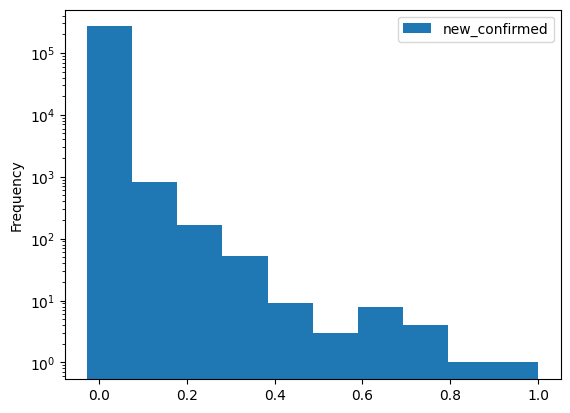

In [76]:
#liczba zachorowań na określoną przez Ciebie liczbę osób (np. na 1000 osób)
temp = df['new_confirmed'] / 1000
(temp / temp.abs().max()).to_frame().plot.hist(log=True)

<Axes: ylabel='Frequency'>

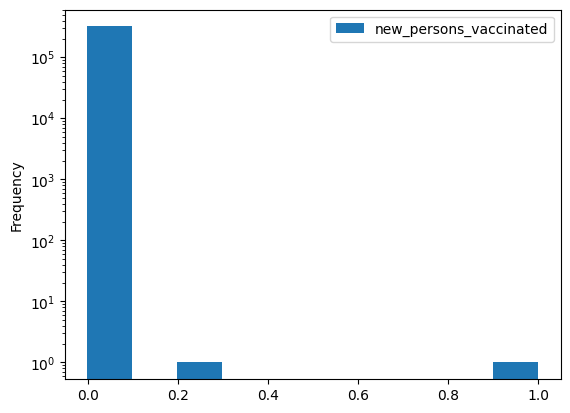

In [77]:
#liczba szczepień na określoną przez Ciebie liczbę osób (np. na 1000 osób)
temp = df['new_persons_vaccinated'] / 1000
(temp / temp.abs().max()).to_frame().plot.hist(log=True)

<Axes: ylabel='Frequency'>

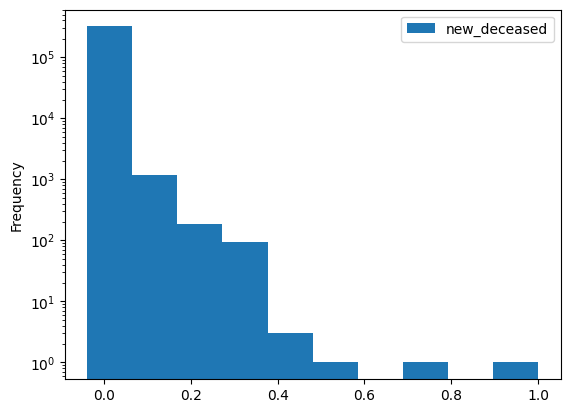

In [74]:
#liczba zgonów na określoną przez Ciebie liczbę osób (np. na 1000 osób)
temp = df['new_deceased'] / 1000
(temp / temp.abs().max()).to_frame().plot.hist(log=True)

### dodatkowe:

<Axes: ylabel='Frequency'>

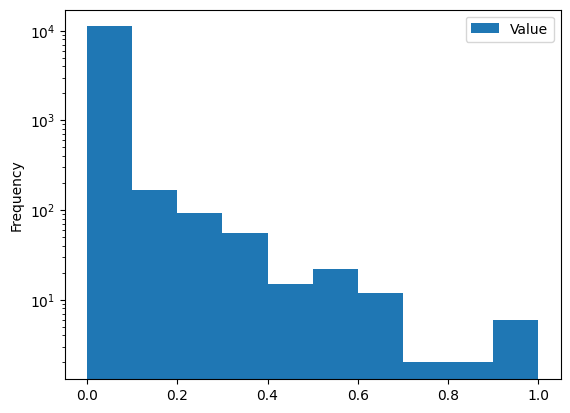

In [75]:
#liczba pkb (np. na 1000 osób)
temp = helper[['Value']]
(temp / temp.abs().max()).plot.hist(log=True)

<Axes: ylabel='Frequency'>

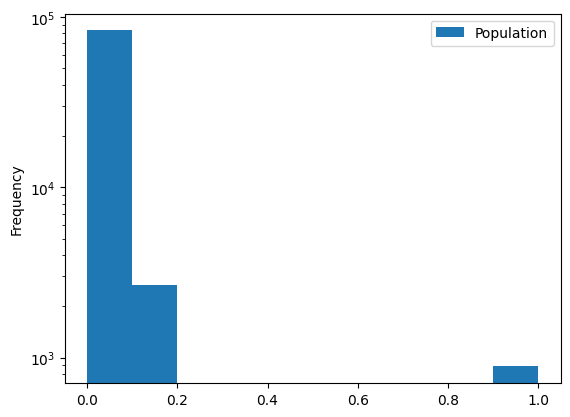

In [79]:
#liczba populacji
temp = df[['Population']]
(temp / temp.abs().max()).plot.hist(log=True)

<Axes: ylabel='Frequency'>

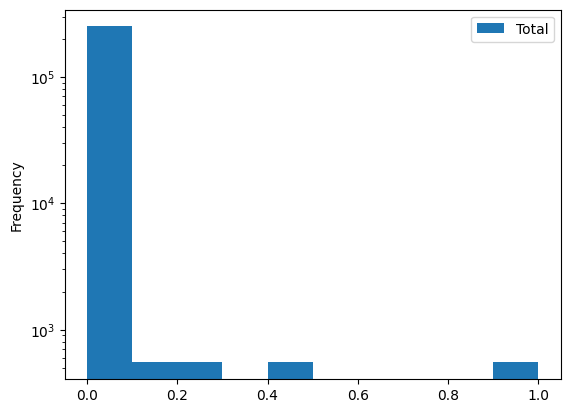

In [80]:
#liczba zanieczyszczenia
temp = df[['Total']]
(temp / temp.abs().max()).plot.hist(log=True)

<Axes: ylabel='Frequency'>

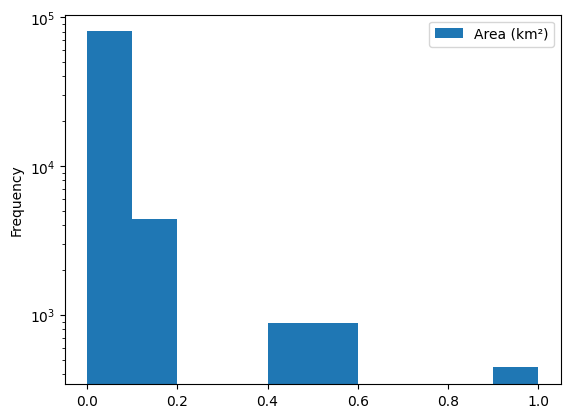

In [82]:
#Growth Rate
temp = df[['Area (km²)']]
(temp / temp.abs().max()).plot.hist(log=True)

In [ ]:
#Growth Rate
temp = df[['Growth Rate']]
(temp / temp.abs().max()).plot.hist(log=True)

## Część 4:

In [144]:
# liczbą nowych zachorowań / szczepień / zgonów, a liczbą nowych zachorowań / szczepień / zgonów,
df[['new_deceased', 'new_persons_vaccinated', 'new_confirmed']].corr()

,new_deceased,new_persons_vaccinated,new_confirmed
new_deceased,1.000000,0.049044,0.561503
new_persons_vaccinated,0.049044,1.000000,0.031584
new_confirmed,0.561503,0.031584,1.000000


In [147]:
# liczbą nowych zachorowań / szczepień / zgonów, a łączną liczbą zachorowań / szczepień / zgonów
tet = df[['new_deceased', 'new_persons_vaccinated', 'new_confirmed']]
tet[['cumulative_deceased', 'cumulative_persons_vaccinated','cumulative_confirmed']] = df[['new_deceased', 'new_persons_vaccinated', 'new_confirmed']].cumsum()
tet.corr()

/tmp/ipykernel_55542/373634163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tet[['cumulative_deceased', 'cumulative_persons_vaccinated','cumulative_confirmed']] = df[['new_deceased', 'new_persons_vaccinated', 'new_confirmed']].cumsum()
/tmp/ipykernel_55542/373634163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tet[['cumulative_deceased', 'cumulative_persons_vaccinated','cumulative_confirmed']] = df[['new_deceased', 'new_persons_vaccinated', 'new_confirmed']].cumsum()
/tmp/ipykernel_55542/37363

,new_deceased,new_persons_vaccinated,new_confirmed,cumulative_deceased,cumulative_persons_vaccinated,cumulative_confirmed
new_deceased,1.000000,0.049044,0.561503,0.000517,0.000704,0.000302
new_persons_vaccinated,0.049044,1.000000,0.031584,-0.000459,-0.000130,-0.000539
new_confirmed,0.561503,0.031584,1.000000,0.001405,0.001560,0.001292
cumulative_deceased,0.000517,-0.000459,0.001405,1.000000,0.997477,0.999964
cumulative_persons_vaccinated,0.000704,-0.000130,0.001560,0.997477,1.000000,0.997404
cumulative_confirmed,0.000302,-0.000539,0.001292,0.999964,0.997404,1.000000


In [148]:
# wskaźnikami gospodarczymi, a liczbą nowych zachorowań / szczepień / zgonów
tet = df[['new_deceased', 'new_persons_vaccinated', 'new_confirmed', 'Growth Rate', 'Rank']]
tet.corr()

,new_deceased,new_persons_vaccinated,new_confirmed,Growth Rate,Rank
new_deceased,1.000000,0.049044,0.561503,-0.097495,-0.276359
new_persons_vaccinated,0.049044,1.000000,0.031584,0.009638,-0.081868
new_confirmed,0.561503,0.031584,1.000000,-0.111962,-0.228899
Growth Rate,-0.097495,0.009638,-0.111962,1.000000,-0.171669
Rank,-0.276359,-0.081868,-0.228899,-0.171669,1.000000


In [150]:
# parametrami demograficznymi, a liczbą nowych zAachorowań / szczepień / zgonów.
tet = df[['new_deceased', 'new_persons_vaccinated', 'new_confirmed', 'Population', 'Density (per km²)']]
tet.corr()

,new_deceased,new_persons_vaccinated,new_confirmed,Population,Density (per km²)
new_deceased,1.000000,0.049044,0.561503,0.286335,-0.032886
new_persons_vaccinated,0.049044,1.000000,0.031584,0.180763,-0.003932
new_confirmed,0.561503,0.031584,1.000000,0.198642,-0.012932
Population,0.286335,0.180763,0.198642,1.000000,-0.025782
Density (per km²),-0.032886,-0.003932,-0.012932,-0.025782,1.000000


### dodatkowe:

In [95]:
# wielkość państwa TODO: niewiem jak powinno się to robic
tet = df[['new_confirmed', 'new_deceased', 'Area (km²)']]

#tet = df[['new_confirmed', 'new_deceased']].groupby(df.date.dt.year).sum()
#tet['Area (km²)'] = df['Area (km²)'].groupby(df.date.dt.year).mean()
tet.dropna().corr()
#tet

,new_confirmed,new_deceased,Area (km²)
new_confirmed,1.000000,0.390567,0.171435
new_deceased,0.390567,1.000000,0.321309
Area (km²),0.171435,0.321309,1.000000


In [97]:
# zanieczyszczenia
tet = df[['new_confirmed', 'new_deceased', 'Total']]
tet.corr()

,new_confirmed,new_deceased,Total
new_confirmed,1.000000,0.561503,0.306853
new_deceased,0.561503,1.000000,0.288627
Total,0.306853,0.288627,1.000000


In [98]:
# mobility
tet = df[['mobility_parks', 'mobility_grocery_and_pharmacy']]
tet.corr()

,mobility_parks,mobility_grocery_and_pharmacy
mobility_parks,1.000000,0.528433
mobility_grocery_and_pharmacy,0.528433,1.000000


In [101]:
# populacja a hdi
tet = df[['population', 'hdi']]
tet.corr()

,population,hdi
population,1.00000,-0.00892
hdi,-0.00892,1.00000


In [103]:
# populacja a hdi
tet = df[['new_confirmed', 'new_deceased', 'mobility_workplaces']]
tet.corr()

,new_confirmed,new_deceased,mobility_workplaces
new_confirmed,1.000000,0.561503,-0.073873
new_deceased,0.561503,1.000000,-0.110505
mobility_workplaces,-0.073873,-0.110505,1.000000
